# Start 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from collections import Counter

In [2]:
data0= pd.read_csv('D:\ML\data\diabetes.csv')
data0=data0.astype(int)
data0.drop_duplicates()
data0.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
data= pd.read_csv('D:\ML\data\kc_house_data.csv')
data['bathrooms']=data['bathrooms'].astype(int)
data['price']=data['price'].astype(int)
data.pop('date')
data.pop('id')
data.pop('lat')
data.pop('long')
data.pop('zipcode')
data['cherdak']=(data['floors']%1*2).astype(int)
data['floors']=data['floors'].astype(int)
data=data.drop_duplicates()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,cherdak
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,0
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,0
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,0
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,0
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,0


# 1 Задание

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

<AxesSubplot: >

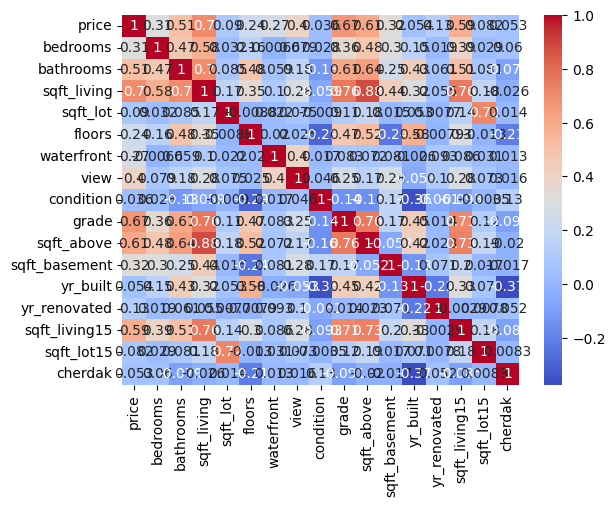

In [5]:
sns.heatmap(data.corr(), cmap='coolwarm',annot=True)


<AxesSubplot: >

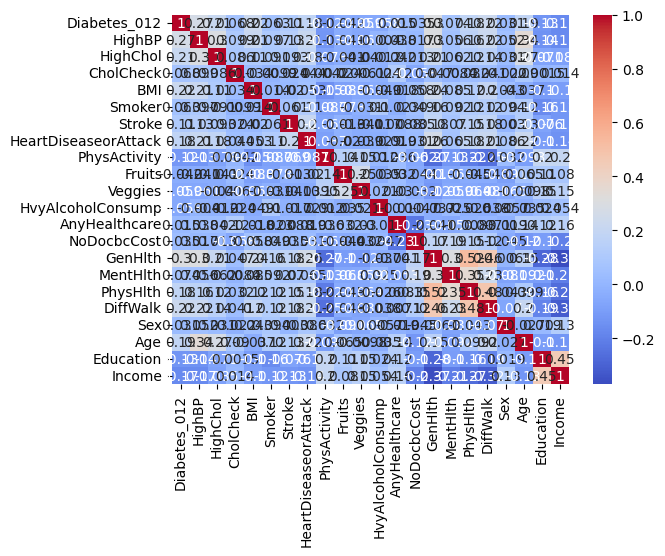

In [6]:
sns.heatmap(data0.corr(), cmap='coolwarm',annot=True)

In [7]:
X=data.drop(['price'],axis=1)
Y=data['price']
X0=data0.drop(['Diabetes_012'],axis=1)
Y0=data0['Diabetes_012']

x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2)
x0_train,x0_test,y0_train,y0_test= train_test_split(X0,Y0, test_size=0.2)


In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters={'max_depth':[3,5,7,11],
    'min_samples_split':[100,200,500],
    'min_samples_leaf':[10,20,50]
}
parameters0={'max_depth':[3,5,7,11],
     'min_samples_split':[1000,2000,5000],
    'min_samples_leaf':[100,200,500]
}

dtc = GridSearchCV(DecisionTreeClassifier(), parameters0).fit(x0_train, y0_train)
dtr=GridSearchCV(DecisionTreeRegressor(),parameters).fit(x_train,y_train)

In [10]:
print(dtc.best_params_,
dtr.best_params_)

{'max_depth': 11, 'min_samples_leaf': 100, 'min_samples_split': 1000} {'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 100}


In [11]:
dtc=DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 100, min_samples_split= 2000).fit(x0_train, y0_train)
dtr=DecisionTreeRegressor(max_depth= 11, min_samples_leaf= 10, min_samples_split= 100).fit(x_train, y_train)
y0_pred=dtc.predict(x0_test)
y_pred=dtr.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report,  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [13]:
print(confusion_matrix(y0_pred,y0_test),'\n\n',classification_report(y0_pred,y0_test))

[[41738   832  5881]
 [    0     0     0]
 [  986    76  1223]] 

               precision    recall  f1-score   support

           0       0.98      0.86      0.92     48451
           1       0.00      0.00      0.00         0
           2       0.17      0.54      0.26      2285

    accuracy                           0.85     50736
   macro avg       0.38      0.47      0.39     50736
weighted avg       0.94      0.85      0.89     50736



D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ML-Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {dtr.score(x_test,y_test)}')

MAE: 128815.03499796963
MSE: 39737796583.48825
MAPE: 0.2636872639162924
R^2: 0.7079671440424207


In [15]:
from sklearn import tree

In [16]:
text_representation = tree.export_text(dtc,feature_names=x0_train.columns.to_list())
print(text_representation)

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 29.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- BMI <= 28.50
|   |   |   |   |   |   |   |--- Income <= 3.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Income >  3.50
|   |   |   |   |   |   |   |   |--- BMI <= 27.50
|   |   |   |   |   |   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Income >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  6.50
|   |   |   |   |   |   |   |   |   |   |--- MentHlth <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- MentHlth >  6.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |

In [17]:
text_representation = tree.export_text(dtr,feature_names=x_train.columns.to_list())
print(text_representation)

|--- grade <= 8.50
|   |--- sqft_living <= 2039.00
|   |   |--- grade <= 7.50
|   |   |   |--- yr_built <= 1930.50
|   |   |   |   |--- grade <= 6.50
|   |   |   |   |   |--- sqft_lot15 <= 5976.50
|   |   |   |   |   |   |--- sqft_living15 <= 1355.00
|   |   |   |   |   |   |   |--- sqft_basement <= 60.00
|   |   |   |   |   |   |   |   |--- sqft_lot15 <= 3450.00
|   |   |   |   |   |   |   |   |   |--- value: [368566.94]
|   |   |   |   |   |   |   |   |--- sqft_lot15 >  3450.00
|   |   |   |   |   |   |   |   |   |--- value: [289728.32]
|   |   |   |   |   |   |   |--- sqft_basement >  60.00
|   |   |   |   |   |   |   |   |--- value: [388107.42]
|   |   |   |   |   |   |--- sqft_living15 >  1355.00
|   |   |   |   |   |   |   |--- sqft_living <= 900.00
|   |   |   |   |   |   |   |   |--- value: [339265.12]
|   |   |   |   |   |   |   |--- sqft_living >  900.00
|   |   |   |   |   |   |   |   |--- sqft_lot15 <= 5105.00
|   |   |   |   |   |   |   |   |   |--- value: [449216.17]
|   

## Pycaret

In [18]:
from pycaret.utils import version
import pycaret.regression as pr
import pycaret.classification as pc
version()

'3.2.0'

In [19]:
pc.setup(data=data0,  target='Diabetes_012', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Diabetes_012
2,Target type,Multiclass
3,Original data shape,"(253680, 22)"
4,Transformed data shape,"(253680, 22)"
5,Transformed train set shape,"(177576, 22)"
6,Transformed test set shape,"(76104, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [20]:
dt_class = pc.create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7638,0.6012,0.7638,0.7792,0.7712,0.1788,0.1794
1,0.7697,0.6067,0.7697,0.7818,0.7755,0.1892,0.1896
2,0.7714,0.6063,0.7714,0.7819,0.7766,0.1895,0.1898
3,0.7657,0.5960,0.7657,0.7775,0.7715,0.1728,0.1731
4,0.7664,0.5988,0.7664,0.7783,0.7722,0.1772,0.1775
5,0.7674,0.6010,0.7674,0.7792,0.7731,0.1802,0.1805
6,0.7648,0.6012,0.7648,0.7793,0.7718,0.1796,0.1801
7,0.7654,0.5987,0.7654,0.7779,0.7714,0.1751,0.1755
8,0.7705,0.6075,0.7705,0.7815,0.7758,0.1897,0.1901


In [21]:
tuned_dt_class = pc.tune_model(dt_class)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8471,0.8020,0.8471,0.8005,0.8082,0.1939,0.2395
1,0.8481,0.8037,0.8481,0.8017,0.8031,0.1628,0.2218
2,0.8482,0.8042,0.8482,0.8019,0.8024,0.1589,0.2197
3,0.8472,0.8001,0.8472,0.7991,0.8041,0.1709,0.2241
4,0.8476,0.8022,0.8476,0.8005,0.8033,0.1648,0.2214
5,0.8475,0.8082,0.8475,0.8009,0.8081,0.1930,0.2402
6,0.8463,0.7974,0.8463,0.7962,0.8000,0.1493,0.2057
7,0.8492,0.8060,0.8492,0.8042,0.8047,0.1704,0.2311
8,0.8477,0.8094,0.8477,0.8013,0.8091,0.1987,0.2445


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
pr.setup(data=data,  target='price', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,price
2,Target type,Regression
3,Original data shape,"(21607, 17)"
4,Transformed data shape,"(21607, 17)"
5,Transformed train set shape,"(15124, 17)"
6,Transformed test set shape,"(6483, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [23]:
dt_reg = pr.create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,159208.9332,62123742979.8467,249246.3500,0.6852,0.3844,0.3123
1,157231.2181,62067246365.3913,249132.9893,0.5315,0.3835,0.3135
2,152134.2611,56211694781.3648,237090.0563,0.4510,0.3840,0.3085
3,155646.1943,67218553079.1937,259265.4105,0.4394,0.3919,0.3069
4,156999.0969,67655931426.6946,260107.5382,0.5665,0.3888,0.3041
5,159836.5456,63352750799.5936,251699.7235,0.5192,0.3926,0.3179
6,157818.4805,68604798090.4863,261925.1765,0.5030,0.3878,0.3130
7,157846.3175,58899999396.5344,242693.2207,0.4629,0.4004,0.3277
8,152513.1653,58805606625.7024,242498.6735,0.5974,0.3774,0.3039


In [24]:
tuned_dt_reg = pr.tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,145580.5743,62275024191.5291,249549.6427,0.6845,0.3382,0.2815
1,135692.7796,56222506491.9756,237112.8560,0.5756,0.3281,0.2643
2,129657.4875,38756660686.7412,196867.1143,0.6215,0.3192,0.2669
3,129048.8949,44916998196.7990,211936.3069,0.6254,0.3206,0.2611
4,137521.8137,60260123935.4486,245479.3758,0.6139,0.3260,0.2672
5,135376.2436,45038849087.5733,212223.5828,0.6582,0.3232,0.2684
6,138145.8050,57661878488.0489,240128.8789,0.5823,0.3284,0.2731
7,137541.1216,44977023224.1258,212077.8707,0.5898,0.3320,0.2807
8,134114.6420,45093531263.0799,212352.3752,0.6913,0.3242,0.2670


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# CART

In [78]:
class CART:
    def __init__(self, max_depth=None, min_samples_split=2, classification=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classification = classification


    class Node:
        def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
            self.feature = feature
            self.threshold = threshold
            self.value = value
            self.left = left
            self.right = right

    def split_dataset(self, X, y, feature, threshold):
        left_indices = np.where(X[:, feature] <= threshold)[0]
        right_indices = np.where(X[:, feature] > threshold)[0]
        return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

    def entropy(self, y):
        class_counts = Counter(y)
        probabilities = np.array(list(class_counts.values())) / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def mse(self, y):
        return np.mean((y - np.mean(y))**2)

    def find_best_split(self, X, y):
        best_feature, best_threshold, best_score = None, None, float('inf')
        n_features = X.shape[1]
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                if self.classification:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.entropy(y_left) + len(y_right) * self.entropy(y_right)
                else:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.mse(y_left) + len(y_right) * self.mse(y_right)
                if score < best_score:
                    best_feature, best_threshold, best_score = feature, threshold, score
        return best_feature, best_threshold

    def majority_vote(self, y):
        class_counts = Counter(y)
        return class_counts.most_common(1)[0][0]

    def build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(X) < self.min_samples_split:
            if self.classification:
                return self.Node(value=self.majority_vote(y))
            else:
                return self.Node(value=np.mean(y))

        feature, threshold = self.find_best_split(X, y)
        X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
        left_child = self.build_tree(X_left, y_left, depth + 1)
        right_child = self.build_tree(X_right, y_right, depth + 1)

        return self.Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        self.tree_ = self.build_tree(np.array(X), np.array(y))

    def predict_single(self, x, node):
        x=np.array(x)
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        else:
            return self.predict_single(x, node.right)
   
    def predict(self, X):
        X=np.array(X)
        y_pred = np.zeros(len(X), dtype=int if self.classification else float)

        for i in range(len(X)):
            y_pred[i] = self.predict_single(X[i], self.tree_)

        return y_pred


In [79]:
Cart_reg=CART(max_depth=11, min_samples_split=10, classification=False)

In [80]:
Cart_reg.fit(x_train,y_train)
y_cart_predicted=Cart_reg.predict(x_test)

In [85]:
print(f'MAE: {mean_absolute_error(y_test, y_cart_predicted)}')
print(f'MSE: {mean_squared_error(y_test, y_cart_predicted)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_cart_predicted)}')

MAE: 134335.31318344054
MSE: 46462762784.62989
MAPE: 0.27182898616972534


In [82]:
Cart_class=CART(max_depth=5, min_samples_split=2, classification=True)

In [83]:
Cart_class.fit(x0_train,y0_train)
y0_cart_predicted=Cart_class.predict(x0_test)

In [84]:
print(classification_report(y0_cart_predicted,y0_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     49023
           1       0.00      0.00      0.00         0
           2       0.14      0.56      0.22      1713

    accuracy                           0.85     50736
   macro avg       0.37      0.47      0.38     50736
weighted avg       0.96      0.85      0.89     50736



# Ансамбли

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth= 11, min_samples_leaf= 100, min_samples_split= 2000)
                        , n_estimators=10).fit(x0_train, y0_train)
y_bag_pred = bag.predict(x0_test)
print(classification_report(y_bag_pred,y0_test))


### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=25, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gbc.fit(x0_train, y0_train)
y_gbc_pred = gbc.predict(x0_test)
print(classification_report(y_gbc_pred,y0_test))

### StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier
stc = StackingClassifier(estimators = [('dtc',dtc)],final_estimator=dtc).fit(x0_train, y0_train)
y_stc_pred = stc.predict(x0_test)
print(classification_report(y_stc_pred,y0_test))

### BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(estimator=dtr,n_estimators=25).fit(x_train,y_train)
y_bag_pred=bag.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_bag_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_bag_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_bag_pred)}')
print(f'R^2: {bag.score(x_test,y_test)}')

### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=20, learning_rate=0.5, max_features=3, max_depth=3, random_state=0).fit(x_train, y_train)
y_gbr_pred = gbr.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_gbr_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_gbr_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_gbr_pred)}')
print(f'R^2: {gbr.score(x_test,y_test)}')

### StackingRegressor

In [ ]:
from sklearn.ensemble import StackingRegressor
str = StackingRegressor(estimators = [('dtr',dtr)],final_estimator=dtr).fit(x_train, y_train)
y_str_pred=str.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_str_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_str_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_str_pred)}')
print(f'R^2: {str.score(x_test,y_test)}')

# 3 Задание

## Catboost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=5, learning_rate=0.5).fit(x0_train,y0_train)
y_cbc_pred=cbc.predict(x0_test)
print(classification_report(y_cbc_pred,y0_test))

In [ ]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(iterations=5, learning_rate=0.5).fit(x_train,y_train)
y_cbr_pred=cbr.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_cbr_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_cbr_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_cbr_pred)}')
print(f'R^2: {cbr.score(x_test,y_test)}')

## XGboost

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective='binary:logistic' , n_estimators=250 , learning_rate=0.10, max_depth=7).fit(x0_train,y0_train)
y_xgbc_pred=xgbc.predict(x0_test)
print(classification_report(y_xgbc_pred,y0_test))

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(eval_metric='rmsle', n_estimators=350 , learning_rate=0.10, max_depth=7).fit(x_train,y_train)
y_xgbr_pred=xgbr.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_xgbr_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_xgbr_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_xgbr_pred)}')
print(f'R^2: {xgbr.score(x_test,y_test)}')

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgc = LGBMClassifier().fit(x0_train, y0_train)
y_lgc_pred=lgc.predict(x0_test)
print(classification_report(y_lgc_pred,y0_test))

In [ ]:
from lightgbm import LGBMRegressor
lgr = LGBMRegressor().fit(x_train, y_train)
y_lgr_pred=lgr.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_lgr_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_lgr_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_lgr_pred)}')
print(f'R^2: {lgr.score(x_test,y_test)}')